# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

In [1]:
# Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

### Question 1

#### Read the dataset

In [2]:
# Importing the data set:
df = pd.read_csv('01-10-2021.csv')

#### Display the top 5 rows in the data

In [3]:
# Displaying the first 5 rows:
df.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-11 05:21:50  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-11 05:21:50  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-11 05:21:50  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-11 05:21:50  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-11 05:21:50 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      53489    2277      43948    7264  Afghanistan   
1  20.168300      63595    1241      37648   24706      Albania   
2   1.659600     102144    2807      69212   30125      Algeria   
3   1.521800       8586      85       7724     777      Andorra   
4  17.873900      18193     416      13872    3905       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     137.403749             4.256950  
1    2209.847800             1.951411  
2     232.934026             2.748081  
3   11112.405358             0.989984  
4      55.354627             2.286594

#### Show the information of the dataset

In [4]:
# To get some basic information about our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
# Finding the number of null values:
null_values = df.isnull().sum()
null_values

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64

In [6]:
# To find out how much of data is missing from individual features in percentage:
# As this step can also weigh in, in our decision to handle the missing values:
round(null_values/len(df)*100,2)

FIPS                   18.62
Admin2                 18.49
Province_State          4.44
Country_Region          0.00
Last_Update             0.00
Lat                     2.22
Long_                   2.22
Confirmed               0.00
Deaths                  0.00
Recovered               0.00
Active                  0.00
Combined_Key            0.00
Incident_Rate           2.22
Case_Fatality_Ratio     1.22
dtype: float64

In [7]:
# As evident from the aforementioned stats 'FIPS' and 'Admin' have high percentage of missing values, and are not required for the purpose of this EDA, means we can drop it:
df = df.drop(columns=['FIPS','Admin2'])
df.head()

Province_State Country_Region          Last_Update       Lat      Long_  \
0            NaN    Afghanistan  2021-01-11 05:21:50  33.93911  67.709953   
1            NaN        Albania  2021-01-11 05:21:50  41.15330  20.168300   
2            NaN        Algeria  2021-01-11 05:21:50  28.03390   1.659600   
3            NaN        Andorra  2021-01-11 05:21:50  42.50630   1.521800   
4            NaN         Angola  2021-01-11 05:21:50 -11.20270  17.873900   

   Confirmed  Deaths  Recovered  Active Combined_Key  Incident_Rate  \
0      53489    2277      43948    7264  Afghanistan     137.403749   
1      63595    1241      37648   24706      Albania    2209.847800   
2     102144    2807      69212   30125      Algeria     232.934026   
3       8586      85       7724     777      Andorra   11112.405358   
4      18193     416      13872    3905       Angola      55.354627   

   Case_Fatality_Ratio  
0             4.256950  
1             1.951411  
2             2.748081  
3             0.989984  
4             2.286594

In [8]:
# lets find out which countries have missing provinces:
missing_provinces = df[df['Province_State'].isna()]['Country_Region']
print('Rows with missing Provinces: {len(missing_provinces)}')
# Lets find out if the missing province values is associated with any one country or is it spread out
print(f'Number of countries with missing provinces data: {len(missing_provinces.unique())}')
missing_provinces.unique()

Rows with missing Provinces: {len(missing_provinces)}
Number of countries with missing provinces data: 178


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Holy See', 'Honduras', 'Hungary', 'Iceland'

In [9]:
df.dropna(subset=['Province_State'],inplace=True)

In [10]:
df.head()

Province_State Country_Region          Last_Update      Lat  \
8   Australian Capital Territory      Australia  2021-01-11 05:21:50 -35.4735   
9                New South Wales      Australia  2021-01-11 05:21:50 -33.8688   
10            Northern Territory      Australia  2021-01-11 05:21:50 -12.4634   
11                    Queensland      Australia  2021-01-11 05:21:50 -27.4698   
12               South Australia      Australia  2021-01-11 05:21:50 -34.9285   

       Long_  Confirmed  Deaths  Recovered  Active  \
8   149.0124        118       3        115       0   
9   151.2093       5018      54          0    4964   
10  130.8456         90       0         71      19   
11  153.0251       1278       6       1243      29   
12  138.6007        588       4        569      15   

                               Combined_Key  Incident_Rate  \
8   Australian Capital Territory, Australia      27.563653   
9                New South Wales, Australia      61.813254   
10            Northern Territory, Australia      36.644951   
11                    Queensland, Australia      24.982895   
12               South Australia, Australia      33.475662   

    Case_Fatality_Ratio  
8              2.542373  
9              1.076126  
10             0.000000  
11             0.469484  
12             0.680272

## Observations:
1. We could have replace the nul values with a place holder such as 'unknown area'.
2. Since this study is in hindsight of events so dropping them was the choice preffered.

### Question 2

#### Show the number of Confirmed cases by Country

In [11]:
# Displaying the number of confirmed cases by country:
country_confirmed = df.groupby('Country_Region')[['Confirmed']].sum().reset_index()
country_confirmed

Country_Region  Confirmed
0        Australia      28614
1          Belgium     664263
2           Brazil    8110118
3           Canada     669592
4            Chile     641923
5            China     103754
6         Colombia    1786900
7          Denmark        675
8           France      62905
9          Germany    1911277
10           India   10466595
11           Italy    2276491
12           Japan     289144
13        Malaysia     135992
14          Mexico    1534039
15     Netherlands     885098
16     New Zealand          0
17        Pakistan     504293
18            Peru    1026180
19          Russia    3366715
20           Spain    2050360
21          Sweden     489471
22              US   22613201
23         Ukraine    1150265
24  United Kingdom    3081319

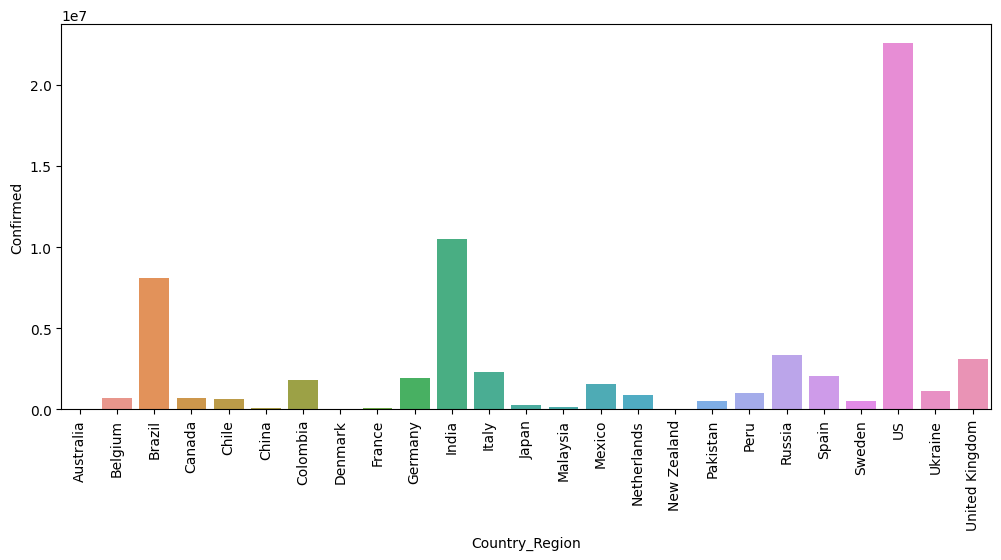

In [12]:
# Plotting the data:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=country_confirmed,x='Country_Region',y='Confirmed')
plt.xticks(rotation=90)
plt.show()

#### Show the number of Deaths by Country

In [13]:
# Displaying deaths by country:
country_deaths = df.groupby('Country_Region')[['Deaths']].sum().reset_index()
country_deaths

Country_Region  Deaths
0        Australia     909
1          Belgium   20078
2           Brazil  203259
3           Canada   17065
4            Chile   17096
5            China    4792
6         Colombia   46114
7          Denmark       1
8           France     504
9          Germany   40343
10           India  151160
11           Italy   78755
12           Japan    4067
13        Malaysia     551
14          Mexico  133706
15     Netherlands   12461
16     New Zealand       0
17        Pakistan   10676
18            Peru   94976
19          Russia   60963
20           Spain   51874
21          Sweden    9433
22              US  379769
23         Ukraine   20641
24  United Kingdom  104841

[]

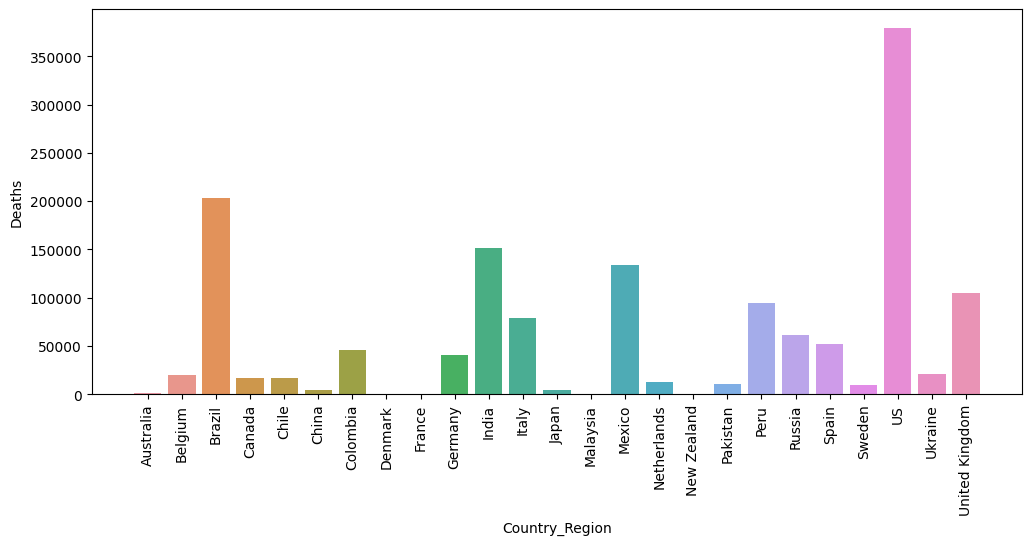

In [14]:
# Plotting the data:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=country_deaths,x='Country_Region',y='Deaths')
plt.xticks(rotation=90)
plt.plot()

#### Show the number of Recovered cases by Country

In [15]:
#Number of recovered cases by country: 
recoverd_country = df.groupby('Country_Region')[['Recovered']].sum().reset_index()
recoverd_country

Country_Region  Recovered
0        Australia      22621
1          Belgium          0
2           Brazil    7231336
3           Canada     565049
4            Chile     602861
5            China      90697
6         Colombia    1621019
7          Denmark        635
8           France      30054
9          Germany    1566907
10           India   10092909
11           Italy    1617804
12           Japan     220380
13        Malaysia     108108
14          Mexico    1150422
15     Netherlands      10952
16     New Zealand          0
17        Pakistan     458371
18            Peru     968335
19          Russia    2750102
20           Spain     150376
21          Sweden          0
22              US          0
23         Ukraine     820385
24  United Kingdom       7013

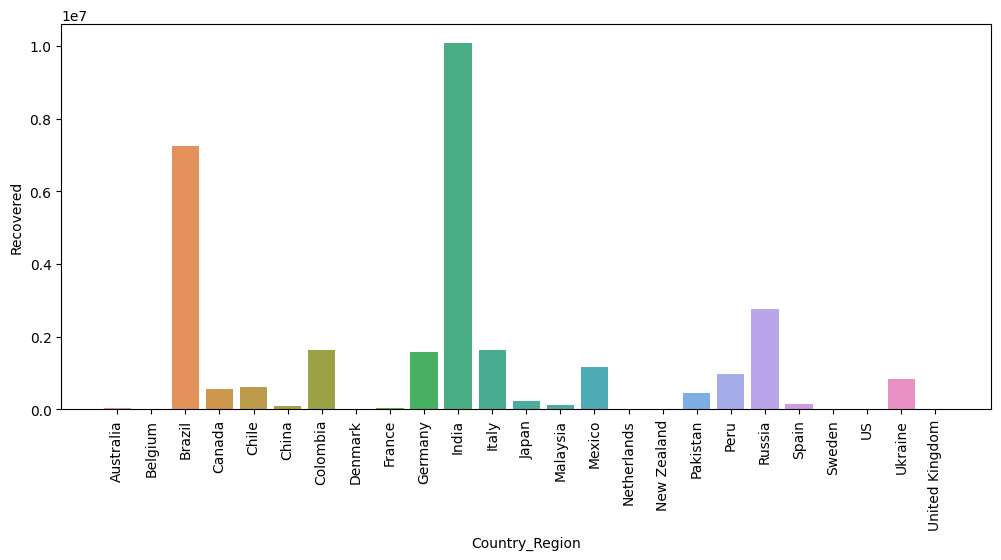

In [16]:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=recoverd_country,x='Country_Region',y='Recovered')
plt.xticks(rotation=90)
plt.plot();

#### Show the number of Active Cases by Country

In [17]:
active_country = df.groupby('Country_Region')[['Active']].sum().reset_index()
active_country

Country_Region    Active
0        Australia      5084
1          Belgium    653149
2           Brazil    671354
3           Canada     84253
4            Chile     21966
5            China      1335
6         Colombia    119767
7          Denmark        39
8           France     32347
9          Germany    321567
10           India    222526
11           Italy    579932
12           Japan     64697
13        Malaysia     27333
14          Mexico   1400333
15     Netherlands    861685
16     New Zealand         0
17        Pakistan     35246
18            Peru    931204
19          Russia    555650
20           Spain   1848110
21          Sweden    480038
22              US  22185827
23         Ukraine    309239
24  United Kingdom   2992792

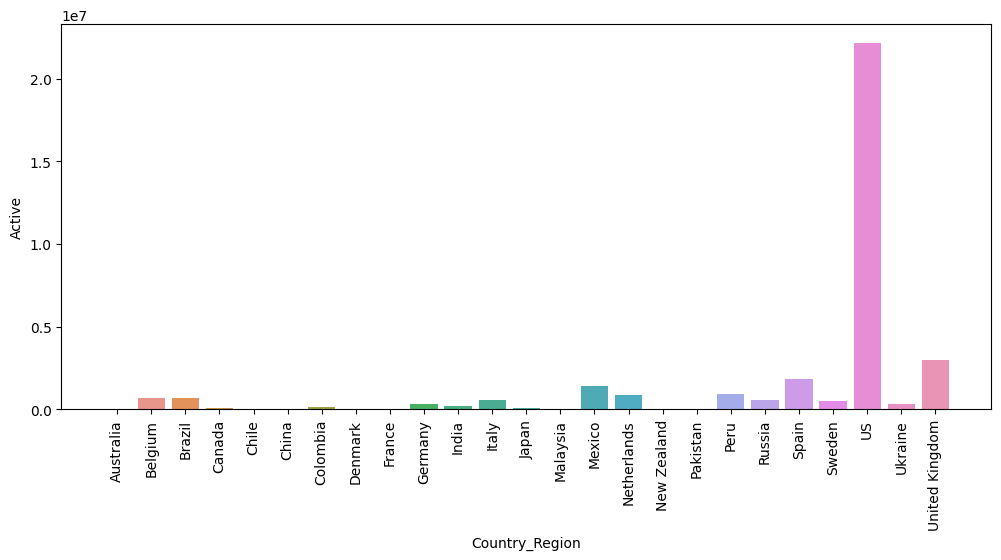

In [18]:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=active_country,x='Country_Region',y='Active')
plt.xticks(rotation=90)
plt.plot();

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [19]:
df.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

Country_Region  Confirmed  Deaths  Recovered    Active
0        Australia      28614     909      22621      5084
1          Belgium     664263   20078          0    653149
2           Brazil    8110118  203259    7231336    671354
3           Canada     669592   17065     565049     84253
4            Chile     641923   17096     602861     21966
5            China     103754    4792      90697      1335
6         Colombia    1786900   46114    1621019    119767
7          Denmark        675       1        635        39
8           France      62905     504      30054     32347
9          Germany    1911277   40343    1566907    321567
10           India   10466595  151160   10092909    222526
11           Italy    2276491   78755    1617804    579932
12           Japan     289144    4067     220380     64697
13        Malaysia     135992     551     108108     27333
14          Mexico    1534039  133706    1150422   1400333
15     Netherlands     885098   12461      10952    861685
16     New Zealand          0       0          0         0
17        Pakistan     504293   10676     458371     35246
18            Peru    1026180   94976     968335    931204
19          Russia    3366715   60963    2750102    555650
20           Spain    2050360   51874     150376   1848110
21          Sweden     489471    9433          0    480038
22              US   22613201  379769          0  22185827
23         Ukraine    1150265   20641     820385    309239
24  United Kingdom    3081319  104841       7013   2992792

### Question 3

### Show the countries with no recovered cases

In [20]:
# Countries struggling with no recovered cases:
no_rec = df.groupby('Country_Region')[['Recovered']].sum().reset_index()
no_rec[no_rec['Recovered']==0]

Country_Region  Recovered
1         Belgium          0
16    New Zealand          0
21         Sweden          0
22             US          0

#### Show the countries with no confirmed cases

In [21]:
# Countries with no covid cases at specific point in time:
nocases_confirmed = df.groupby('Country_Region')[['Confirmed']].sum().reset_index()
nocases_confirmed[nocases_confirmed['Confirmed'] == 0]

Country_Region  Confirmed
16    New Zealand          0

#### Show the countries with no deaths

In [22]:
# Countries with no deaths:
no_deaths=df.groupby('Country_Region')[['Deaths']].sum().reset_index()
no_deaths[no_deaths['Deaths'] == 0]

Country_Region  Deaths
16    New Zealand       0

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [23]:
# Top 10 countries with confirmed cases:
top_unfiltered =df.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum()
top_10 = top_unfiltered.nlargest(10,'Confirmed')
top_10

Confirmed  Deaths  Recovered
Country_Region                              
US               22613201  379769          0
India            10466595  151160   10092909
Brazil            8110118  203259    7231336
Russia            3366715   60963    2750102
United Kingdom    3081319  104841       7013
Italy             2276491   78755    1617804
Spain             2050360   51874     150376
Germany           1911277   40343    1566907
Colombia          1786900   46114    1621019
Mexico            1534039  133706    1150422

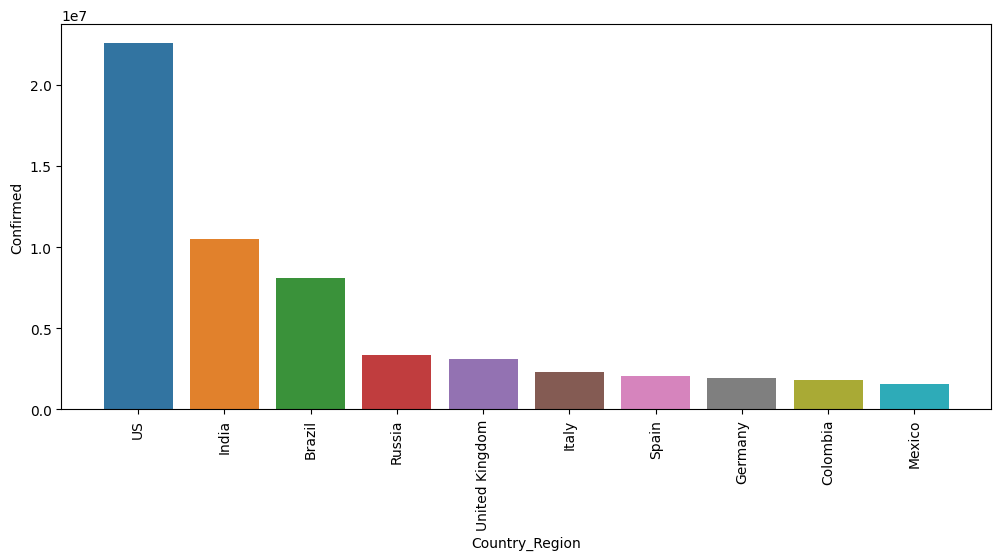

In [24]:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=top_10,x=top_10.index,y='Confirmed')
plt.xticks(rotation=90)
plt.plot();

#### Show the Top 10 Countries with Active cases

In [25]:
# Top 10 active countries wrt covid:
active_top = df.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
active_top10 = active_top.nlargest(10,'Active')
active_top10

Country_Region  Confirmed  Deaths  Recovered    Active
22              US   22613201  379769          0  22185827
24  United Kingdom    3081319  104841       7013   2992792
20           Spain    2050360   51874     150376   1848110
14          Mexico    1534039  133706    1150422   1400333
18            Peru    1026180   94976     968335    931204
15     Netherlands     885098   12461      10952    861685
2           Brazil    8110118  203259    7231336    671354
1          Belgium     664263   20078          0    653149
11           Italy    2276491   78755    1617804    579932
19          Russia    3366715   60963    2750102    555650

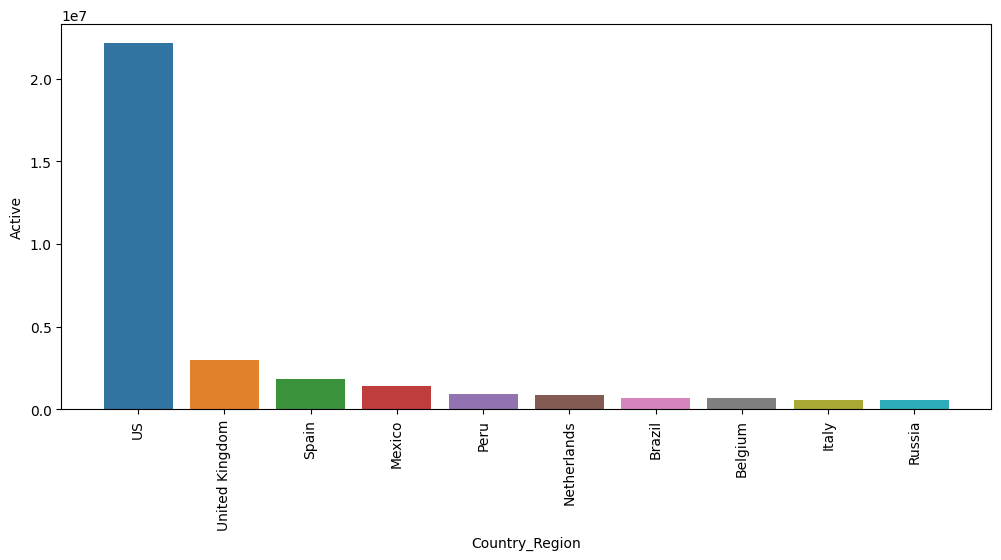

In [26]:
fig = plt.figure(figsize=(12,5))
sns.barplot(data=active_top10,x='Country_Region',y='Active')
plt.xticks(rotation=90)
plt.plot();

### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [27]:
import matplotlib.pyplot as plt

In [28]:
# Plotting the aforementioned attributes but only for coubntries that exceeded 50,000 deaths:

In [29]:
# filtering the data: 
filtered_df = df[df['Deaths'] > 50000][['Country_Region','Confirmed','Recovered','Active','Deaths']]

In [30]:
filter_df = df.groupby('Country_Region')[['Confirmed','Recovered','Active','Deaths']].sum()

In [31]:
filter_df = filter_df[filter_df['Deaths'] > 50000]

In [32]:
filter_df

Confirmed  Recovered    Active  Deaths
Country_Region                                        
Brazil            8110118    7231336    671354  203259
India            10466595   10092909    222526  151160
Italy             2276491    1617804    579932   78755
Mexico            1534039    1150422   1400333  133706
Peru              1026180     968335    931204   94976
Russia            3366715    2750102    555650   60963
Spain             2050360     150376   1848110   51874
US               22613201          0  22185827  379769
United Kingdom    3081319       7013   2992792  104841

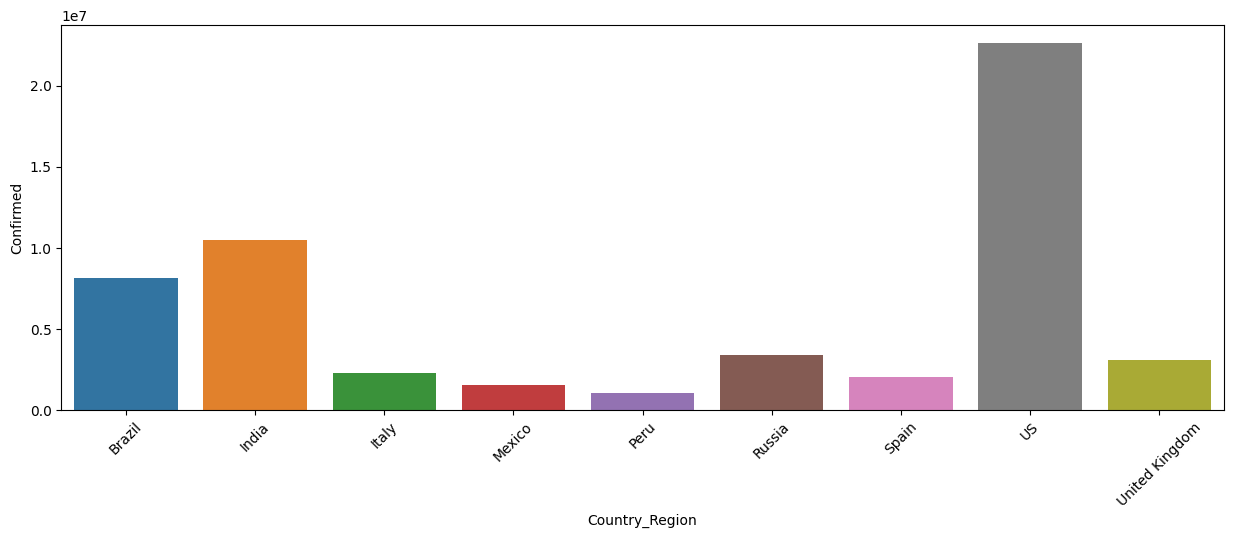

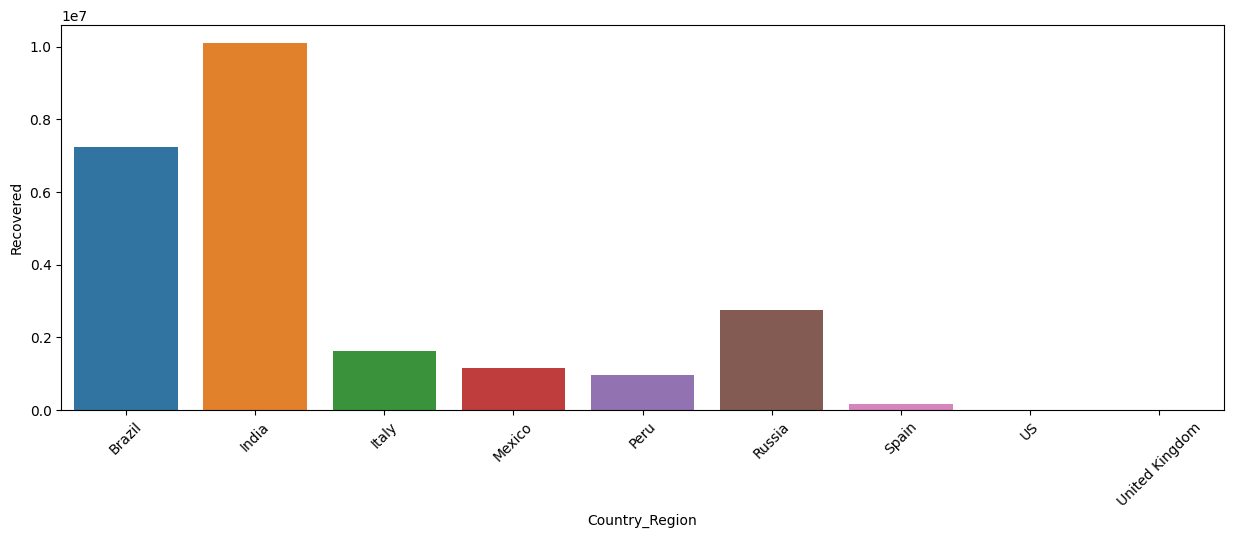

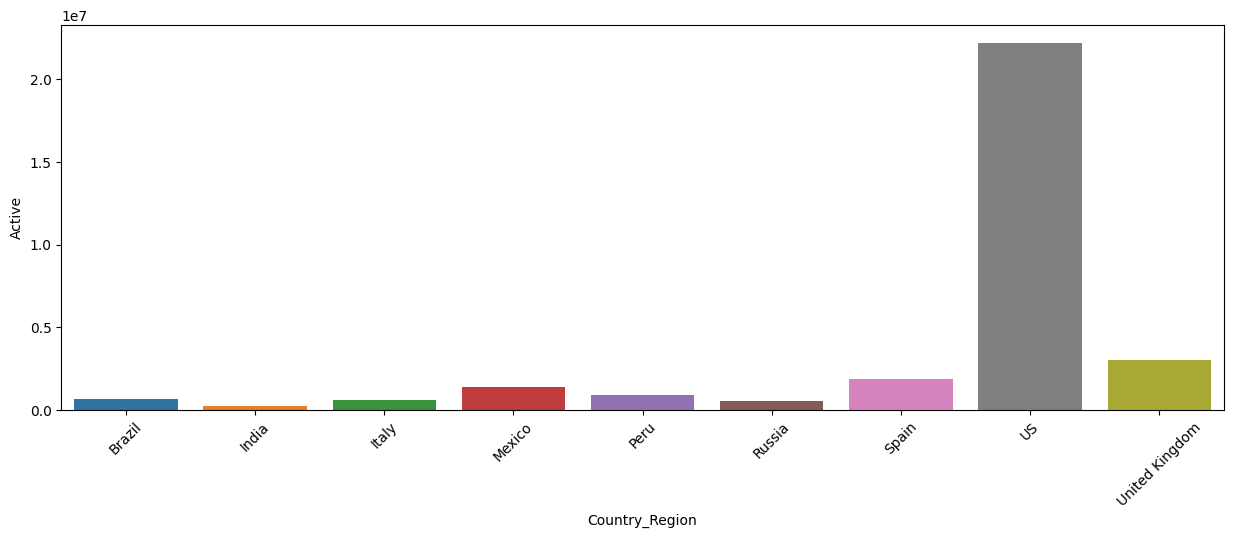

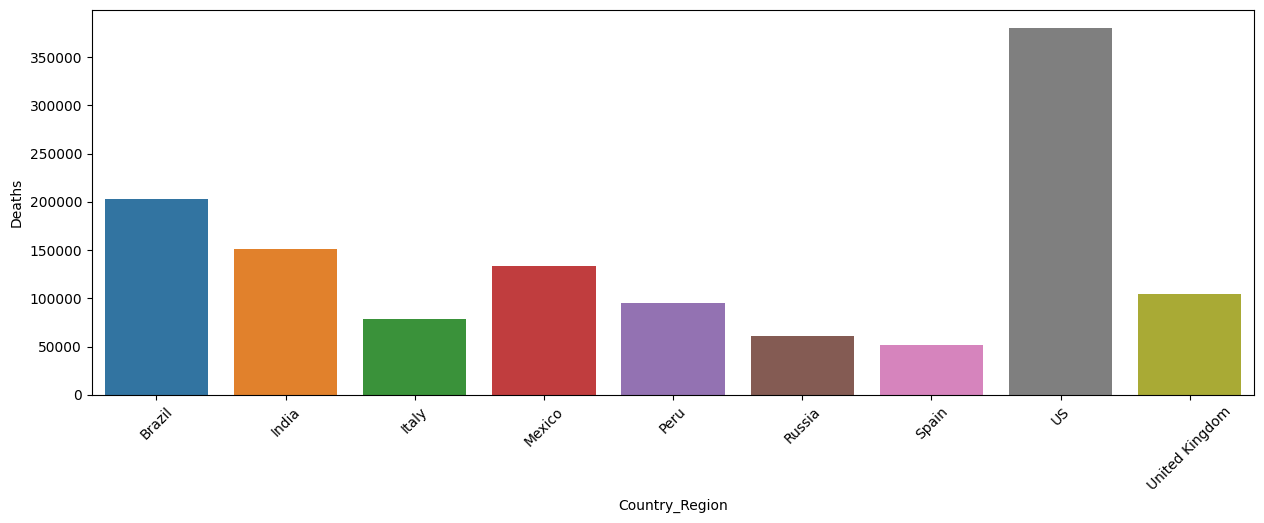

In [33]:
# plt.figure(figsize=(15,5))
for i in filter_df.columns:
    plt.figure(figsize=(15,5))
    sns.barplot(data=filter_df,x=filter_df.index,y=i,label=i)
    plt.xticks(rotation=45)
    plt.show();
    

### Question 6

### Plot Province/State wise Deaths in USA

In [34]:
import plotly.express as px

In [35]:
# Importing data:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [36]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [37]:
# Filtering US only:
us_covid_data = covid_data[covid_data['Country_Region'] == 'US']

In [38]:
us_covid_data.head(2)

FIPS   Admin2 Province_State Country_Region          Last_Update  \
649  1001.0  Autauga        Alabama             US  2021-01-10 05:22:12   
650  1003.0  Baldwin        Alabama             US  2021-01-10 05:22:12   

           Lat      Long_  Confirmed  Deaths  Recovered  Active  \
649  32.539527 -86.644082       4847      53          0    4794   
650  30.727750 -87.722071      15202     173          0   15029   

             Combined_Key  Incident_Rate  Case_Fatality_Ratio  
649  Autauga, Alabama, US    8675.651972             1.093460  
650  Baldwin, Alabama, US    6809.894550             1.138008

In [39]:
# Calculating the total deaths at point in time:
us_deaths_states = us_covid_data.groupby('Province_State')['Deaths'].sum()

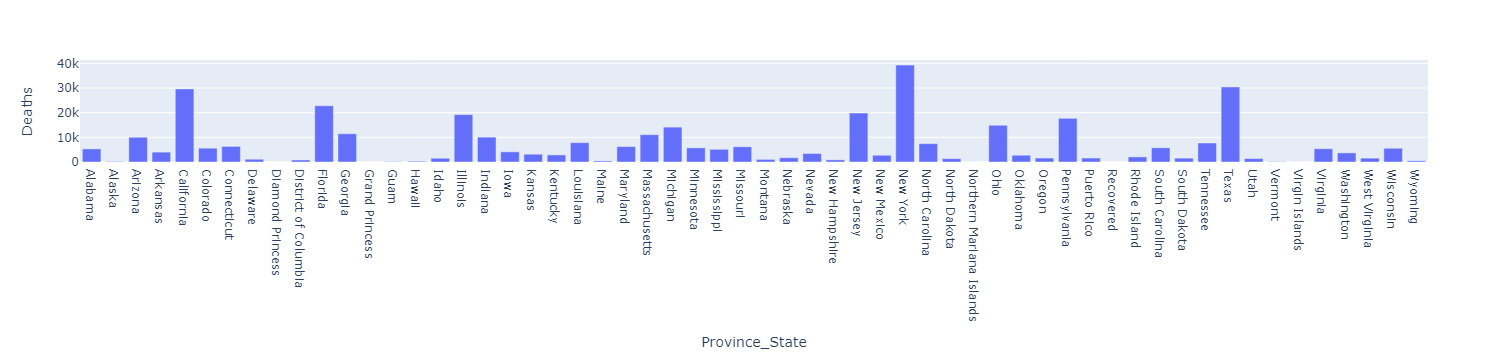

In [40]:
fig = px.bar(us_deaths_states,x=us_deaths_states.index,y='Deaths')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [41]:
# Here we will make use of heat map to visualize covid Hotspots in US

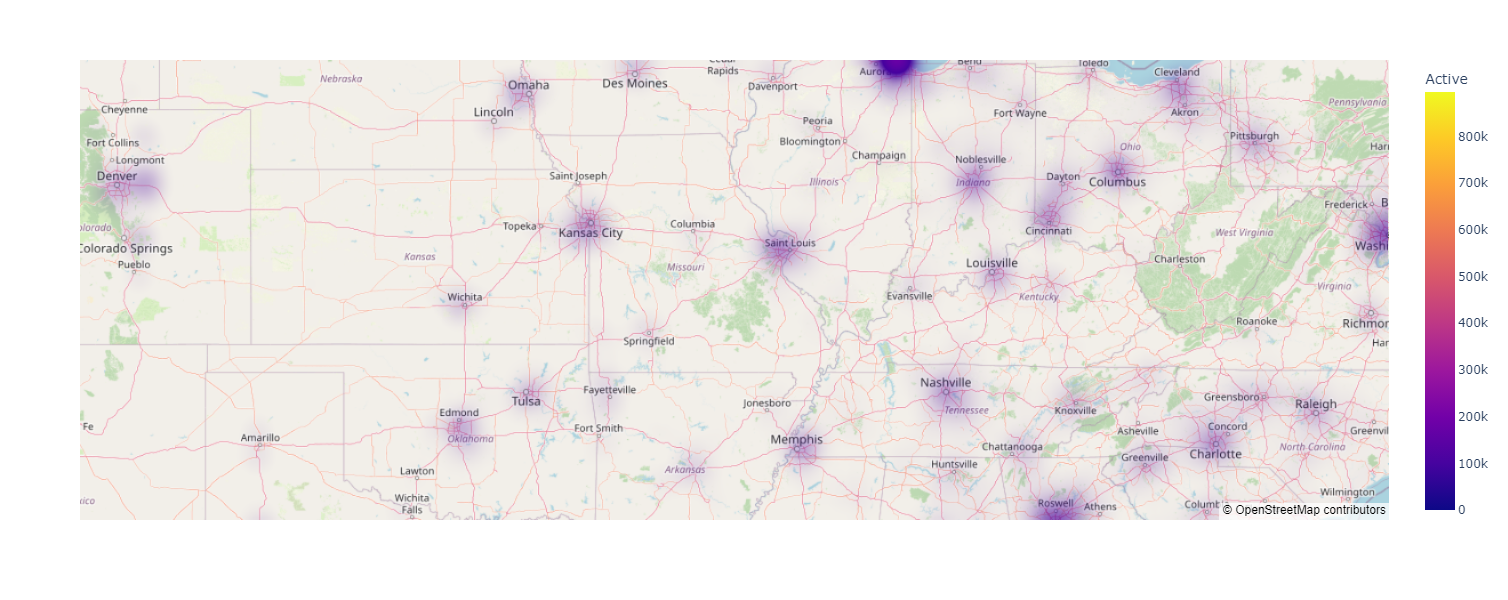

In [42]:

fig = px.density_mapbox(us_covid_data,lat='Lat',lon='Long_',z='Active',mapbox_style='open-street-map',radius=35,zoom=5)
fig.update_layout(height=600)

fig.show();

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [43]:
# Statewise Confirmed cases in US:
us_confirmed = us_covid_data.groupby('Province_State').sum().reset_index()

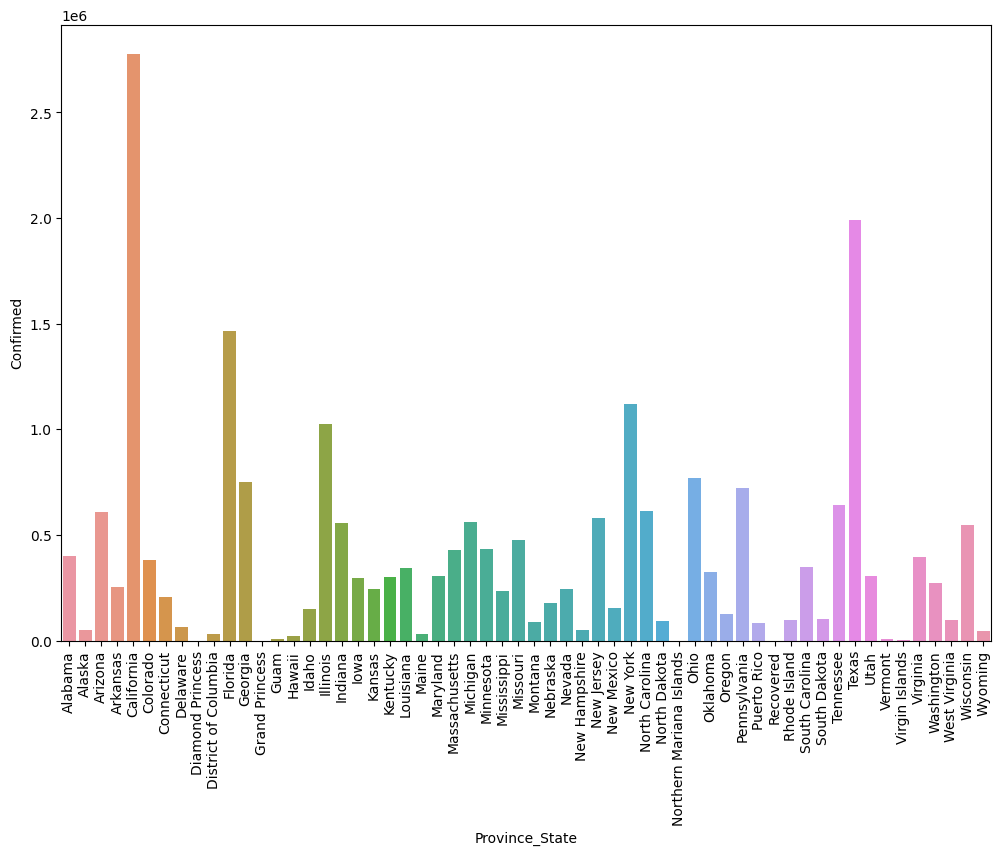

In [44]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=us_confirmed,x='Province_State',y='Confirmed')
plt.xticks(rotation=90)
plt.show();

### Question 9

### Plot Worldwide Confirmed Cases over time

In [45]:
# Since the data provided was static and not time series, i made a judgement call to find an utilize  worl wide data that is time series in nature:

In [46]:
# importing the data:
covid_timeseries = pd.read_csv('owid-covid-data.csv')

In [47]:
covid_timeseries['Date'] = pd.to_datetime(covid_timeseries.date)

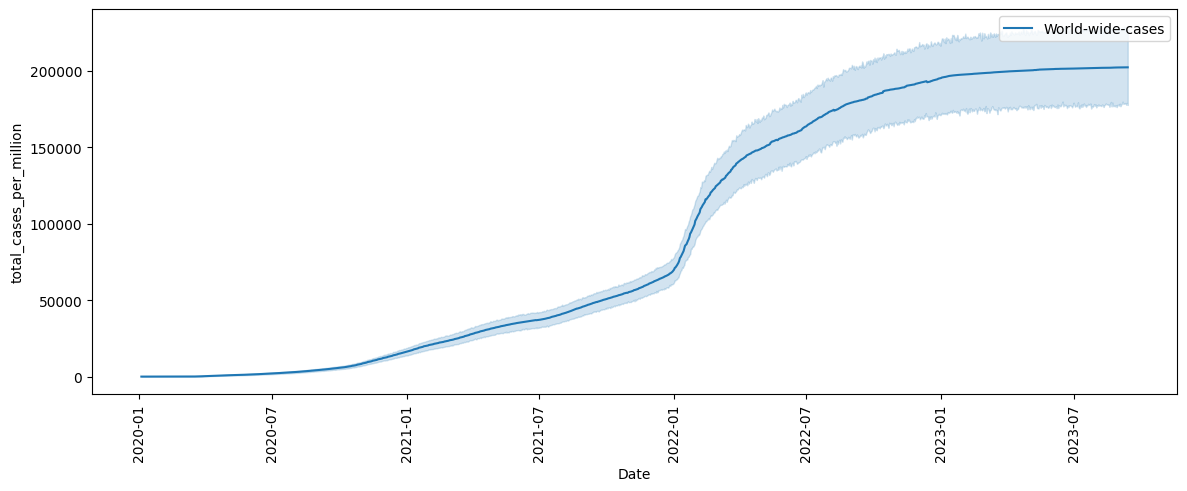

In [50]:
# Visualizing the world wide trend :
fig = plt.figure(figsize=(14,5))
sns.lineplot(data=covid_timeseries,x='Date',y='total_cases_per_million',label='World-wide-cases')
plt.xticks(rotation=90)
plt.legend()
plt.plot();

In [51]:
# Lets find out what was the trend in different continents and what could we have inferenced from it:
covid_timeseries = covid_timeseries.set_index(['continent','Date'])
covid_timeseries

iso_code     location        date  total_cases  \
continent Date                                                        
Asia      2020-01-03      AFG  Afghanistan  2020-01-03          NaN   
          2020-01-04      AFG  Afghanistan  2020-01-04          NaN   
          2020-01-05      AFG  Afghanistan  2020-01-05          NaN   
          2020-01-06      AFG  Afghanistan  2020-01-06          NaN   
          2020-01-07      AFG  Afghanistan  2020-01-07          NaN   
...                       ...          ...         ...          ...   
Africa    2023-09-09      ZWE     Zimbabwe  2023-09-09     265737.0   
          2023-09-10      ZWE     Zimbabwe  2023-09-10     265742.0   
          2023-09-11      ZWE     Zimbabwe  2023-09-11     265742.0   
          2023-09-12      ZWE     Zimbabwe  2023-09-12     265742.0   
          2023-09-13      ZWE     Zimbabwe  2023-09-13     265742.0   

                      new_cases  new_cases_smoothed  total_deaths  new_deaths  \
continent Date                                                                  
Asia      2020-01-03        0.0                 NaN           NaN         0.0   
          2020-01-04        0.0                 NaN           NaN         0.0   
          2020-01-05        0.0                 NaN           NaN         0.0   
          2020-01-06        0.0                 NaN           NaN         0.0   
          2020-01-07        0.0                 NaN           NaN         0.0   
...                         ...                 ...           ...         ...   
Africa    2023-09-09        0.0               0.000        5717.0         0.0   
          2023-09-10        5.0               0.714        5718.0         1.0   
          2023-09-11        0.0               0.714        5718.0         0.0   
          2023-09-12        0.0               0.714        5718.0         0.0   
          2023-09-13        0.0               0.714        5718.0         0.0   

                      new_deaths_smoothed  total_cases_per_million  ...  \
continent Date                                                      ...   
Asia      2020-01-03                  NaN                      NaN  ...   
          2020-01-04                  NaN                      NaN  ...   
          2020-01-05                  NaN                      NaN  ...   
          2020-01-06                  NaN                      NaN  ...   
          2020-01-07                  NaN                      NaN  ...   
...                                   ...                      ...  ...   
Africa    2023-09-09                0.000                16282.367  ...   
          2023-09-10                0.143                16282.673  ...   
          2023-09-11                0.143                16282.673  ...   
          2023-09-12                0.143                16282.673  ...   
          2023-09-13                0.143                16282.673  ...   

                      male_smokers  handwashing_facilities  \
continent Date                                               
Asia      2020-01-03           NaN                  37.746   
          2020-01-04           NaN                  37.746   
          2020-01-05           NaN                  37.746   
          2020-01-06           NaN                  37.746   
          2020-01-07           NaN                  37.746   
...                            ...                     ...   
Africa    2023-09-09          30.7                  36.791   
          2023-09-10          30.7                  36.791   
          2023-09-11          30.7                  36.791   
          2023-09-12          30.7                  36.791   
          2023-09-13          30.7                  36.791   

                      hospital_beds_per_thousand  life_expectancy  \
continent Date                                                      
Asia      2020-01-03                         0.5            64.83   
          2020-01-04                         0.5     

In [52]:
result = {}
for i,x in covid_timeseries.groupby(level=0):
    result[i] = x

In [53]:
result.keys()

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

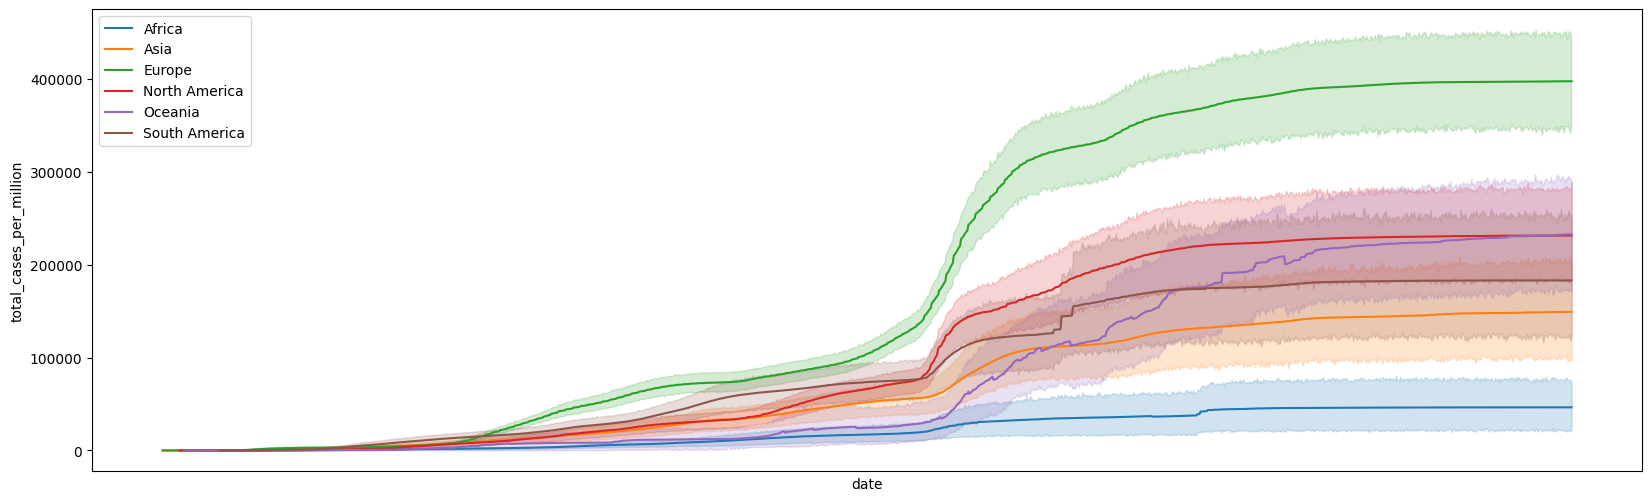

In [54]:
fig,ax = plt.subplots(figsize=(20,6))
for i,key in enumerate(result.keys()):
    df_continent = result[key].reset_index()
    sns.lineplot(data=df_continent,x='date',y='total_cases_per_million',label = key,ax=ax)
    plt.xticks([])
plt.show();

## Observation:
1. *It is evident from the data, that covid cases in some continents played the role of leading indicators for other continents.*
2. *Europe lead the race in terms of covid deaths in the world.*